# A Comparative Study between Wuhan-Hu-1 and Delta-1/2021 Strains

## Problem statement

RNA plays a fundamental role in the virus's genetic material and replication. The coronavirus, including SARS-CoV-2, the virus responsible for COVID-19, is an RNA virus. Its genetic information is stored in the form of single-stranded RNA rather than DNA.

The viral RNA of the coronavirus serves as a template for the synthesis of viral proteins. When the virus infects a host cell, it hijacks the cellular machinery to replicate its RNA and produce new viral particles. The viral RNA also acts as messenger RNA (mRNA) for the synthesis of viral proteins, facilitating the assembly of new virus particles.

Understanding the specific RNA sequences of the virus is crucial. The RNA sequence provides the genetic code that dictates the structure and function of viral proteins. Changes or mutations in the RNA sequence can significantly impact the virus's behavior, transmissibility, and ability to evade the host's immune response.

Monitoring and analyzing RNA sequences from different strains of the virus help researchers track the evolution of the virus and identify emerging variants. Changes in the RNA sequence, particularly in regions associated with the virus's spike protein, may influence its interaction with host cells and the effectiveness of vaccines.

Therefore, in this project i did study on the RNA sequence of the corona virus and detecting variations which is essential for developing targeted interventions, including vaccines and treatments. It allows scientists to stay ahead of the virus's evolution, understand its behavior, and adapt strategies to control its spread and mitigate the impact on public health.

<figure>
 <img src="rna_image.jpg"   style="width:400px;height:300px;">
</figure>

                                                 image source: cleveland clinic (2020)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

The dataset of coronavirus variants was downloaded from the NCBI website

In [2]:
df = pd.read_csv("ncbi_datasets.csv",low_memory=False)

In [3]:
df.head()

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12,PRJNA485481,NaN
1,OM487257.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-220129247957/2021,29815,GenBank,complete,North America; USA,NaN,NaN,9606,2021-12-23,PRJNA614995,SAMN25559487
2,OM403304.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/VM20001061-2/2020,29870,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
3,OM403303.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/Original/2020,29851,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
4,OM401120.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-211112790633/2021,29712,GenBank,complete,North America; USA,NaN,NaN,9606,2021-09-25,PRJNA614995,SAMN23427251


## EDA

In [4]:
df.shape

(847791, 16)

In [5]:
df.isnull().sum()

Nucleotide Accession         0
Species Taxonomy Id          0
Species Name                 0
Virus Genus                  0
Virus Family                 0
Isolate Name            238138
Nucleotide Length            0
Sequence Type                0
Nuc Completeness             0
Geo Location                71
US State                847791
Host Name               847791
Host Taxonomy ID             0
Collection Date            196
BioProject              236008
BioSample               257205
dtype: int64

In [6]:
df.dtypes

Nucleotide Accession     object
Species Taxonomy Id       int64
Species Name             object
Virus Genus              object
Virus Family             object
Isolate Name             object
Nucleotide Length         int64
Sequence Type            object
Nuc Completeness         object
Geo Location             object
US State                float64
Host Name               float64
Host Taxonomy ID          int64
Collection Date          object
BioProject               object
BioSample                object
dtype: object

`Collection Date` column's datatype is string so lets convert it into datetime type.

In [7]:
#df["Collection Date"] = pd.to_datetime(df["Collection Date"])

#getting this error
'''ValueError: unconverted data remains when parsing with format "%Y-%m": "-23", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually.
      You might want to use `dayfirst` alongside this.'''


'ValueError: unconverted data remains when parsing with format "%Y-%m": "-23", at position 1. You might want to try:\n    - passing `format` if your strings have a consistent format;\n    - passing `format=\'ISO8601\'` if your strings are all ISO8601 but not necessarily in exactly the same format;\n    - passing `format=\'mixed\'`, and the format will be inferred for each element individually.\n      You might want to use `dayfirst` alongside this.'

Collection dates are written in three formats, yy-mm-dd, yy-mm and yy. so to handle these values we can do following:

In [8]:
from dateutil import parser
from datetime import datetime


def parse_date(date_string):
    
    if pd.isna(date_string) or not isinstance(date_string, str):
        return pd.NaT  
    
    try:
        return parser.parse(date_string, default=datetime.strptime(date_string, '%Y-%m') if len(date_string) == 7 else None)
    
    except ValueError:
        return pd.NaT

`what above function does?`

The function checks if the input date_string is NaN or not a string. If true, it returns pd.NaT.
If the input is a valid string, it attempts to parse the date using dateutil.parser.parse
If the parsing fails due to a missing day component, the function uses datetime.strptime to set the default day to 1, creating a complete date string.
The function returns the parsed datetime object or pd.NaT if parsing is unsuccessful.

`default=datetime.strptime(date_string, '%Y-%m'):`

The default parameter is used to provide a default value in case parsing fails. Here, it uses datetime.strptime to create a datetime object with a default day value of 1.

datetime.strptime(date_string, '%Y-%m') takes the date_string and converts it to a datetime object using the format '%Y-%m', where %Y represents the year and %m represents the month.

`if len(date_string) == 7 else None:`

This is a conditional expression that checks if the length of date_string is equal to 7 characters. A length of 7 indicates a date without the day component.

If the condition is true, it returns the datetime.strptime value created in the previous step. Otherwise, it returns None.

In [9]:
df['Collection Date'] = df['Collection Date'].apply(parse_date)

In [10]:
df.dtypes

Nucleotide Accession            object
Species Taxonomy Id              int64
Species Name                    object
Virus Genus                     object
Virus Family                    object
Isolate Name                    object
Nucleotide Length                int64
Sequence Type                   object
Nuc Completeness                object
Geo Location                    object
US State                       float64
Host Name                      float64
Host Taxonomy ID                 int64
Collection Date         datetime64[ns]
BioProject                      object
BioSample                       object
dtype: object

In [11]:
df.head()

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN
1,OM487257.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-220129247957/2021,29815,GenBank,complete,North America; USA,NaN,NaN,9606,2021-12-23,PRJNA614995,SAMN25559487
2,OM403304.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/VM20001061-2/2020,29870,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
3,OM403303.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/Original/2020,29851,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
4,OM401120.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-211112790633/2021,29712,GenBank,complete,North America; USA,NaN,NaN,9606,2021-09-25,PRJNA614995,SAMN23427251


Let's remove continents name from `Geo Location` column and add them into new column "Continents"

In [12]:
df["Continents"] = df["Geo Location"].str.replace(";.+","",regex=True)

Above code uses the str.replace method with a regular expression to replace everything after the first semicolon (;) in each string in the "Geo Location" column with an empty string.

In [13]:
df.head()

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample,Continents
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia
1,OM487257.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-220129247957/2021,29815,GenBank,complete,North America; USA,NaN,NaN,9606,2021-12-23,PRJNA614995,SAMN25559487,North America
2,OM403304.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/VM20001061-2/2020,29870,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN,Asia
3,OM403303.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/Original/2020,29851,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN,Asia
4,OM401120.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-211112790633/2021,29712,GenBank,complete,North America; USA,NaN,NaN,9606,2021-09-25,PRJNA614995,SAMN23427251,North America


Let's check first sequence collected in each continent

In [14]:
df.groupby("Continents").apply(lambda x: x.sort_values("Collection Date").iloc[0])

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample,Continents
Continents,,,,,,,,,,,,,,,,,
Africa,OL336607.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/MLI/M00960/2020,29890,GenBank,complete,Africa; Mali,NaN,NaN,9606,2020-02-06,NaN,NaN,Africa
Asia,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia
Europe,MT270109.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/DEU/BavPat11-ChVir1459/2020,29782,GenBank,complete,Europe; Germany: Bavaria,NaN,NaN,9606,2020-01-01,NaN,NaN,Europe
North America,MW585340.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/OH-UHTL-3/2020,29897,GenBank,complete,North America; USA: Ohio,NaN,NaN,9606,2020-01-05,NaN,NaN,North America
Oceania,MT007544.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/AUS/VIC01/2020,29893,GenBank,complete,"Oceania; Australia: Melbourne, Victoria",NaN,NaN,9606,2020-01-25,PRJNA613958,SAMN15366226,Oceania
South America,MT126808.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/BRA/SP02/2020,29876,GenBank,complete,South America; Brazil,NaN,NaN,9606,2020-02-28,NaN,NaN,South America


No. of sequences collected in each continent:

In [15]:
df["Continents"].value_counts()

Continents
North America    571069
Europe           254520
Oceania           10603
Asia               8581
Africa             2192
South America       755
Name: count, dtype: int64

summary length of nucleotide

In [16]:
df["Nucleotide Length"].describe()

count    847791.000000
mean      29825.747932
std          69.937482
min        2859.000000
25%       29786.000000
50%       29819.000000
75%       29884.000000
max       30018.000000
Name: Nucleotide Length, dtype: float64

Let's find which row has lowest nucleotide length

In [17]:
df[df["Nucleotide Length"]==df["Nucleotide Length"].min()]

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample,Continents
847723,LR877184.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,NaN,2859,GenBank,complete,"Europe; Sweden:Stockholm, Sweden",NaN,NaN,9606,2020-04-26,PRJEB39632,SAMEA7098098,Europe


Here "nuc Completeness"'s value is complete, which refers to genome completeness and as we know complete genome consist approx 30,000 Nucleotide but here it says only 2859 which could be a typo.

No. of samples collected per month:

In [18]:
monthData = pd.Series(df["Collection Date"].values.astype('<M8[M]'))

The expression astype('<M8[M]') is a NumPy method used to convert an array to a specific data type. 
<M8 represents a datetime64 type, and [M] specifies a monthly frequency. It means the resulting array will have datetime values with a monthly precision.

In [19]:
data = monthData.value_counts().sort_index()
data

2019-12-01        16
2020-01-01       201
2020-02-01       385
2020-03-01     29839
2020-04-01     13298
2020-05-01      6529
2020-06-01      9506
2020-07-01     11398
2020-08-01     11702
2020-09-01     13166
2020-10-01     20743
2020-11-01     28892
2020-12-01     35350
2021-01-01     68231
2021-02-01     44564
2021-03-01     49237
2021-04-01     69412
2021-05-01     39809
2021-06-01     20994
2021-07-01     22498
2021-08-01     11412
2021-09-01     15102
2021-10-01     17598
2021-11-01    102642
2021-12-01    131297
2022-01-01     73303
2022-02-01       450
2022-03-01        21
Name: count, dtype: int64

Let's plot this data:

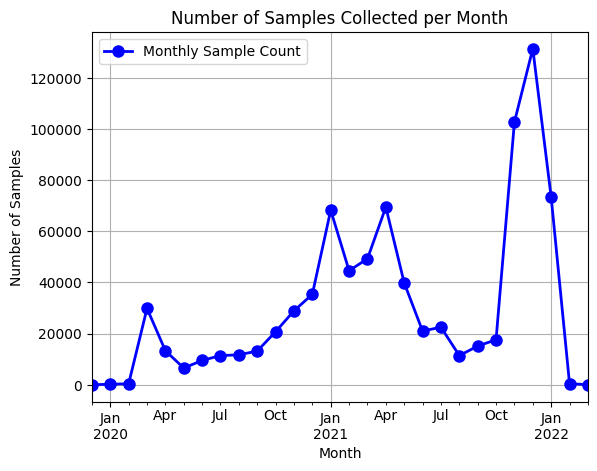

In [20]:
data.plot(style='o-', color='b', linewidth=2, markersize=8, label='Monthly Sample Count') 

plt.title('Number of Samples Collected per Month')
plt.xlabel('Month')
plt.ylabel('Number of Samples')
plt.legend()
plt.grid(True)
plt.show()

Above chart shows no. of samples collected per month

### let's pull out reference sequence (first covid genome which was fully sequenced) to analyze some sequences:

In [21]:
df[df["Sequence Type"]=="RefSeq"]

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample,Continents
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia


Find Sequences of delta variant:

In dataset, sequences(rows) of delta contains word "delta" in isolate name column 

In [22]:
df[df["Isolate Name"].str.contains("Delta").fillna(False)] #filled na with False to avoid misinterpretation

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample,Continents
85804,OM108163.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-3/2021,29860,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-14,NaN,NaN,Asia
85948,OM061695.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-1/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-10,NaN,NaN,Asia
251375,OK091006.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,"SARS-CoV-2/human/JPN/SARS-CoV-2, B.1.617.2 lin...",29836,GenBank,complete,Asia; Japan,NaN,NaN,9606,2021-08-24,NaN,NaN,Asia
665095,OM108132.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-2/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-11,NaN,NaN,Asia


Same process for omicron variant:

In [23]:
df[df["Isolate Name"].str.contains("Omicron").fillna(False)]

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample,Continents
806923,OM095411.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Omicron-1/2021,29788,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-12-08,NaN,NaN,Asia


Selecting Nucleotide Accession of reference sequence, omicron sequence, one delta variant sequence and first sequence of north america (as a base) to download:

In [24]:
Nucleotide_ids = ["NC_045512.2","OL467832.1","OM061695.1","OM095411.1"]
human_names = ["reference","base","delta","omicron"]

In [25]:
selected_sequences = df[df["Nucleotide Accession"].isin(Nucleotide_ids)]
selected_sequences

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample,Continents
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia
85948,OM061695.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-1/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-10,NaN,NaN,Asia
254609,OL467832.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/hCoV_19_USA_ID_IVREF_6520...,29831,GenBank,complete,"North America; USA: Bingham, ID",NaN,NaN,9606,2020-03-27,NaN,NaN,North America
806923,OM095411.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Omicron-1/2021,29788,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-12-08,NaN,NaN,Asia


Using biopython library to download selected sequences

In [26]:
from Bio import Entrez
Entrez.email="add-email-id-here" 

In [27]:
def seq_down(idc):
    handle = Entrez.esearch(db="nucleotide", term=idc, retmax="1")
    record = Entrez.read(handle)
    handle = Entrez.efetch(db="nucleotide", id=record["IdList"][0], rettype="fasta", retmode="text")
    return handle.read()

In [28]:
sequence_dict = {}
for sequence in Nucleotide_ids:
    sequence_dict[sequence] = {"fasta":seq_down(sequence)}

Parsing data of selected Nucleotide_ids

In [29]:
from Bio import SeqIO
import io

In [30]:
for k,v in sequence_dict.items():
    f = io.StringIO(v["fasta"])
    sequence_dict[k]["parsed"] = list(SeqIO.parse(f,"fasta"))[0]

Checking parsed data for reference sequence

In [31]:
sequence_dict["NC_045512.2"]["parsed"]

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='NC_045512.2', name='NC_045512.2', description='NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

## Aligning RNA sequences

In [32]:
from Bio import Align
aligner = Align.PairwiseAligner()

Algorithm used by Aligner is:

In [33]:
aligner.algorithm

'Needleman-Wunsch'

In [34]:
score = aligner.score(sequence_dict["NC_045512.2"]["parsed"].seq, sequence_dict["OM061695.1"]["parsed"].seq)
score

29818.0

In [35]:
ref_length = len(sequence_dict["NC_045512.2"]["parsed"].seq)

In [36]:
Simlarity_bw_Ref_n_delta = score/ref_length
Simlarity_bw_Ref_n_delta

0.9971574758385446

Similarity percentage between Reference and base nucleotide is 0.9971

## Checking alignment across all variants

In [37]:
comparisons = np.zeros((4,4))
comparisons

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [38]:
for i in range(0,4):
    for j in range(0,i+1):
        score = aligner.score(sequence_dict[Nucleotide_ids[i]]["parsed"].seq, sequence_dict[Nucleotide_ids[j]]["parsed"].seq)
        comparisons[i,j]=score

In [39]:
comparisons_df = pd.DataFrame(comparisons, columns=human_names, index=human_names)

In [40]:
comparisons_df

,reference,base,delta,omicron
reference,29903.0,0.0,0.0,0.0
base,29820.0,29831.0,0.0,0.0
delta,29818.0,29775.0,29858.0,0.0
omicron,29725.0,29722.0,29688.0,29788.0


In [41]:
comparisons_df.iloc[:,0] / ref_length

reference    1.000000
base         0.997224
delta        0.997157
omicron      0.994047
Name: reference, dtype: float64

#### percentage change between:

1) ref and base:      0.2776%
2) ref and delta:     0.2843%
3) ref and omicron: **0.5953%**
4) base and delta:    0.0067%
5) base and omicron:  0.3186%
6) delta and omicron: 0.3119%


## Showing sequences mismatches

In [42]:
seq1 = sequence_dict["NC_045512.2"]["parsed"].seq
seq2 = sequence_dict["OM061695.1"]["parsed"].seq

In [43]:
delta_alignments = aligner.align(seq1,seq2)

In [44]:
delta_alignments  #alignment object

In [45]:
delta_alignment = delta_alignments[0]

In [46]:
delta_alignment.shape

(2, 29943)

In [47]:
delta_alignment.aligned

array([[[    0,   209],
        [  210,   212],
        [  212,   240],
        [  241,  1047],
        [ 1048,  1273],
        [ 1274,  1276],
        [ 1276,  3036],
        [ 3037,  3038],
        [ 3038,  4180],
        [ 4181,  6401],
        [ 6402,  7123],
        [ 7123,  7124],
        [ 7125,  8985],
        [ 8986,  8989],
        [ 8989,  9052],
        [ 9053,  9054],
        [ 9054, 10028],
        [10028, 10029],
        [10030, 10506],
        [10507, 11116],
        [11117, 11200],
        [11201, 11331],
        [11332, 11333],
        [11333, 14407],
        [14408, 14409],
        [14409, 15450],
        [15450, 15451],
        [15452, 16465],
        [16466, 19219],
        [19220, 19221],
        [19221, 21617],
        [21618, 21986],
        [21987, 22028],
        [22029, 22030],
        [22033, 22035],
        [22037, 22916],
        [22917, 22918],
        [22918, 22994],
        [22995, 22996],
        [22996, 23402],
        [23403, 23603],
        [23604, 

In [48]:
seq1_end = None
seq2_end = None

for alignments in zip(delta_alignment.aligned[0],delta_alignment.aligned[1]):
    if seq1_end and seq2_end:
        seq1_mismatch = seq1[seq1_end: alignments[0][0]]
        seq2_mismatch = seq2[seq2_end: alignments[1][0]]
        print(f"1: {seq1_mismatch}")
        print(f"2: {seq2_mismatch}")
        
    seq1_end = alignments[0][1]
    seq2_end = alignments[1][1]      

1: G
2: 
1: 
2: T
1: C
2: T
1: G
2: T
1: G
2: 
1: 
2: T
1: C
2: 
1: 
2: T
1: G
2: T
1: C
2: T
1: 
2: T
1: C
2: 
1: C
2: 
1: 
2: T
1: G
2: 
1: 
2: T
1: 
2: T
1: C
2: 
1: C
2: T
1: A
2: R
1: A
2: G
1: A
2: 
1: 
2: G
1: C
2: 
1: 
2: T
1: 
2: A
1: G
2: 
1: C
2: T
1: C
2: 
1: 
2: T
1: C
2: G
1: G
2: A
1: A
2: 
1: TTC
2: 
1: AG
2: 
1: T
2: 
1: 
2: G
1: C
2: 
1: 
2: A
1: A
2: G
1: C
2: G
1: G
2: 
1: 
2: A
1: G
2: 
1: 
2: T
1: G
2: 
1: 
2: T
1: C
2: T
1: T
2: 
1: 
2: C
1: T
2: 
1: 
2: C
1: C
2: T
1: 
2: C
1: T
2: 
1: C
2: T
1: C
2: 
1: 
2: T
1: G
2: 
1: TT
2: 
1: A
2: 
1: CT
2: 
1: A
2: 
1: A
2: G
1: 
2: T
1: G
2: 
1: 
2: T
1: G
2: 
1: G
2: T
1: G
2: T


## Color coding mismatches

In [49]:
from IPython.display import display, HTML

In [50]:
def color_print(s, color="black"):
    return f"<span style='color:{color}'>{s}</span>"

In [51]:
seq1_end = None
seq2_end = None
display_s = []

for alignments in zip(delta_alignment.aligned[0],delta_alignment.aligned[1]):
    
    if seq1_end and seq2_end:
        seq1_mismatch = seq1[seq1_end: alignments[0][0]]
        seq2_mismatch = seq2[seq2_end: alignments[1][0]]
        
        if len(seq2_mismatch)==0:
            display_s.append(color_print(seq1_mismatch,"red"))
        elif len(seq1_mismatch)==0:
            display_s.append(color_print(seq2_mismatch,"green"))
        else:
            display_s.append(color_print(seq2_mismatch,"blue"))
    
    display_s.append(seq1[alignments[0][0]:alignments[0][1]])
            
    seq1_end = alignments[0][1]
    seq2_end = alignments[1][1]   

In [52]:
display_seq = [str(i) for i in display_s]

<figure>
 <img src="dvr.jpg"   style="width:500px;height:500px;">
</figure>

                                      image source: https://biologydictionary.net

<figure>
 <img src="vaccine.png"   style="width:500px;height:300px;">
</figure>

                                        image source: National Human Genome Research Institute

<figure>
 <img src="RNA.svg"   style="width:1000px;height:300px;">
</figure>

                                           image source: Thomas Splettstoesser

In [53]:
display(HTML('<br>'.join(display_seq)))

### Conclusion:

**With this output, the complete sequence is visible.**

1) <span style="color:black">Black </span>indicates alignment between the sequences.

2) <span style="color:red">Red </span>signifies deletions, indicating that a portion of the original sequence was removed. In this instance, the delta variant deleted the reference sequence.

3) <span style="color:green">Green </span>highlights insertions made by the delta variant. 

4) <span style="color:blue">Blue </span>denotes substitutions. 

These visual cues precisely indicate the locations of these events.


Mutation in the RNA sequence of SARS-CoV-2 variants can result in changes to the virus's genetic code, leading to alterations in its properties.

1. **Deletion:**
   - Description: Deletion mutations involve the removal of one or more nucleotides from the RNA sequence. This can result in a shorter genetic code, potentially leading to the loss of specific functions or features encoded by the deleted segment.
   - Impact: Depending on the location and size of the deletion, it may affect crucial viral components, such as spike proteins or replication machinery. Deletions can impact the virus's ability to infect host cells or evade the host immune response.

2. **Substitution:**
   - Description: Substitution mutations occur when one or more nucleotides are replaced by different ones in the RNA sequence. This can lead to the substitution of one amino acid for another during protein synthesis.
   - Impact: Substitutions can influence the virus's structure and function, potentially altering its ability to interact with host cells or evade immune surveillance. Substitutions in key regions, such as the receptor-binding domain of the spike protein, may affect viral infectivity or immune recognition.

3. **Insertion:**
   - Description: Insertion mutations involve the addition of extra nucleotides into the RNA sequence. This can result in an elongated genetic code, potentially leading to the introduction of new functions or features.
   - Impact: Depending on the location and nature of the insertion, it can have diverse effects on viral properties. Insertions may contribute to changes in viral tropism, antigenicity, or replication efficiency. They can also impact the virus-host interaction by introducing novel elements into critical regions.

Understanding these mutation types is crucial for monitoring the evolution of SARS-CoV-2 variants and assessing their potential impact on transmission, severity of disease, and vaccine efficacy. Continuous genomic surveillance and analysis are essential to stay ahead of the virus's adaptive changes and inform public health strategies.